In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


# DATASET DESCRIPTION

We resample the data to reduce the training time. From the 28 selected paths.

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import os, glob


#path = "/content/gdrive/MyDrive/AIMS ESSAY/DATASET 1/LINK_CSV"
#all_files = glob.glob(os.path.join(path, "*.csv"))

#random.seed(28)
#sub_sample=random.sample(all_files, 28)
#random_file=random.randint(0,len(letters)-1)
#df = pd.concat(map(pd.read_csv, sub_sample), ignore_index=True)
#df

In [ ]:
cd '/content/gdrive/MyDrive/AIMS ESSAY/Alice/Compute/Datasets'

/content/gdrive/.shortcut-targets-by-id/1JzB6cIe_w34P-6_kdyX-IseN_U5KPdIb/Alice/Compute/Datasets


In [ ]:
import os, glob

path = "/content/gdrive/MyDrive/AIMS ESSAY/DATASET 1/LINK_CSV"
all_files = glob.glob(os.path.join(path, "*.csv"))
linkId_files=[]

for filename in all_files:
  df = pd.read_csv(filename,sep=',')
  linkId_files.append(df)

## **EXPLORATION OF PATH 4329483**

In [ ]:
path_90=linkId_files[90]


In [ ]:
#WE REARRANGE THE COLUMNS NOW
del path_90['Id']
path_90 = path_90[['linkId'	,	'TravelTime','Speed', 'Date'	,'Time']]

In [ ]:
#This function adds the column of the weekday to the dataset 
def date_week_day(file):
  #file is the name of the csv file you desire
  file['Date']=pd.to_datetime(file.Date, format='%Y-%m-%d')
  #Adding the month column from date column
  file['Month'] = pd.DatetimeIndex(file['Date']).month
  file['Day'] = pd.DatetimeIndex(file['Date']).day
  file['Weekday'] = file['Date'].dt.day_name()
  file['week'] = file['Date'].dt.week
  file.groupby(
    file['Date'].dt.isocalendar().week
).sum('quantity').rename_axis(index='week')
  newfile=file.loc[file['Date'].between('2016-01-01','2016-12-31')]

  #This will extract the month you want
  #file_month=file.loc[file['Month']==month]
  return newfile


In [ ]:
dataframe=date_week_day(path_90)
dataframe

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


,linkId,TravelTime,Speed,Date,Time,Month,Day,Weekday,week
0,4616202,77,67.11,2016-01-01,00:01:00,1,1,Friday,53
1,4616202,83,62.14,2016-01-01,00:06:00,1,1,Friday,53
2,4616202,86,60.27,2016-01-01,00:11:00,1,1,Friday,53
3,4616202,87,60.27,2016-01-01,00:16:00,1,1,Friday,53
4,4616202,87,60.27,2016-01-01,00:21:00,1,1,Friday,53
...,...,...,...,...,...,...,...,...,...
83557,4616202,74,59.03,2016-10-31,9:36,10,31,Monday,44
83558,4616202,78,55.30,2016-10-31,9:41,10,31,Monday,44
83559,4616202,75,57.17,2016-10-31,9:46,10,31,Monday,44
83560,4616202,73,55.92,2016-10-31,9:51,10,31,Monday,44


In [ ]:
#EXTRACTION OF A SINGLE MONTH JANUARY
jan=dataframe.loc[dataframe['Month']==1]
jan

,linkId,TravelTime,Speed,Date,Time,Month,Day,Weekday,week
0,4616202,77,67.11,2016-01-01,00:01:00,1,1,Friday,53
1,4616202,83,62.14,2016-01-01,00:06:00,1,1,Friday,53
2,4616202,86,60.27,2016-01-01,00:11:00,1,1,Friday,53
3,4616202,87,60.27,2016-01-01,00:16:00,1,1,Friday,53
4,4616202,87,60.27,2016-01-01,00:21:00,1,1,Friday,53
...,...,...,...,...,...,...,...,...,...
8822,4616202,80,59.03,2016-01-31,23:30:40,1,31,Sunday,4
8823,4616202,83,57.79,2016-01-31,23:35:40,1,31,Sunday,4
8824,4616202,80,60.27,2016-01-31,23:45:40,1,31,Sunday,4
8825,4616202,81,57.79,2016-01-31,23:50:40,1,31,Sunday,4


In [ ]:
def montly_extraction(df,month,n):
  #ETRACTION OF THE MONTHLY DATA
  df1=df.loc[df['Month']==month]
  #HOURLY SUBSAMPLING
  df1=df1[::n]
  return df1



In [ ]:
jan_60=montly_extraction(dataframe,1,12)
jan_30=montly_extraction(dataframe,1,6)
jan_5=montly_extraction(dataframe,1,1)


In [ ]:
#CONVERSION OF THE DATE AND TIME TO DATETIME COLUMN
def dateTime(df):
  df['DateTime'] =  pd.to_datetime(df.pop('Date')) + pd.to_timedelta(df.pop('Time'))
  return df

In [ ]:
jan_60DT=dateTime(jan_60)
jan_30DT=dateTime(jan_30)
jan_5DT=dateTime(jan_5)

In [ ]:
#PLOTTING MONTHLY PLOTS 

def daily_dateformatter(link):
  import matplotlib.dates as mdates
  from matplotlib.dates import DateFormatter

  fig, ax = plt.subplots(figsize=(25,10))
  ax.plot(link['DateTime'],link['Speed'])
  ax.plot(link['DateTime'],link['Speed'])
  ax.set_ylabel('Average Speed in MPH',fontsize=25)
  ax.set_xlabel('Day of the Month',fontsize=25)
  ax.set_title('60 min Interval: Speed VS Day of the Month of January Plot',fontsize = 25)

  myFmt = DateFormatter("%d %H") #Daily distribution
  ax.xaxis.set_major_formatter(myFmt)

  ## Rotate date labels automatically
  fig.autofmt_xdate()
  return plt.show()

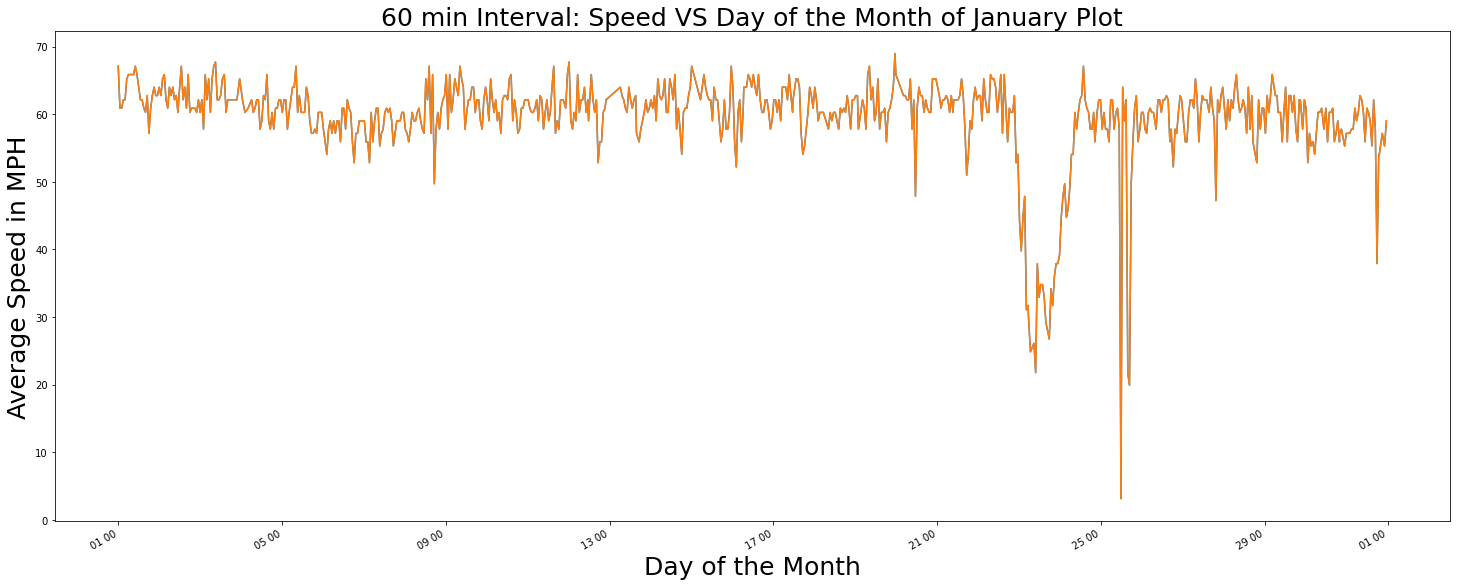

In [ ]:
daily_dateformatter(jan_60DT)

#daily_dateformatter(jan_5DT)

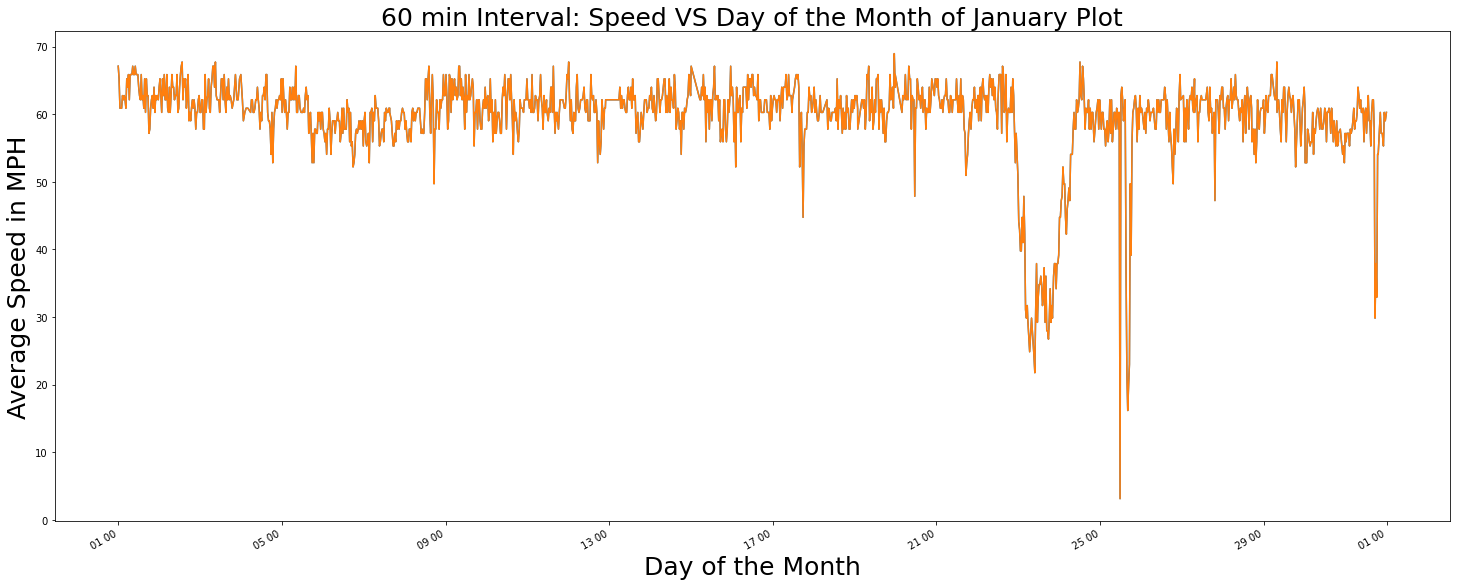

In [ ]:
daily_dateformatter(jan_30DT)

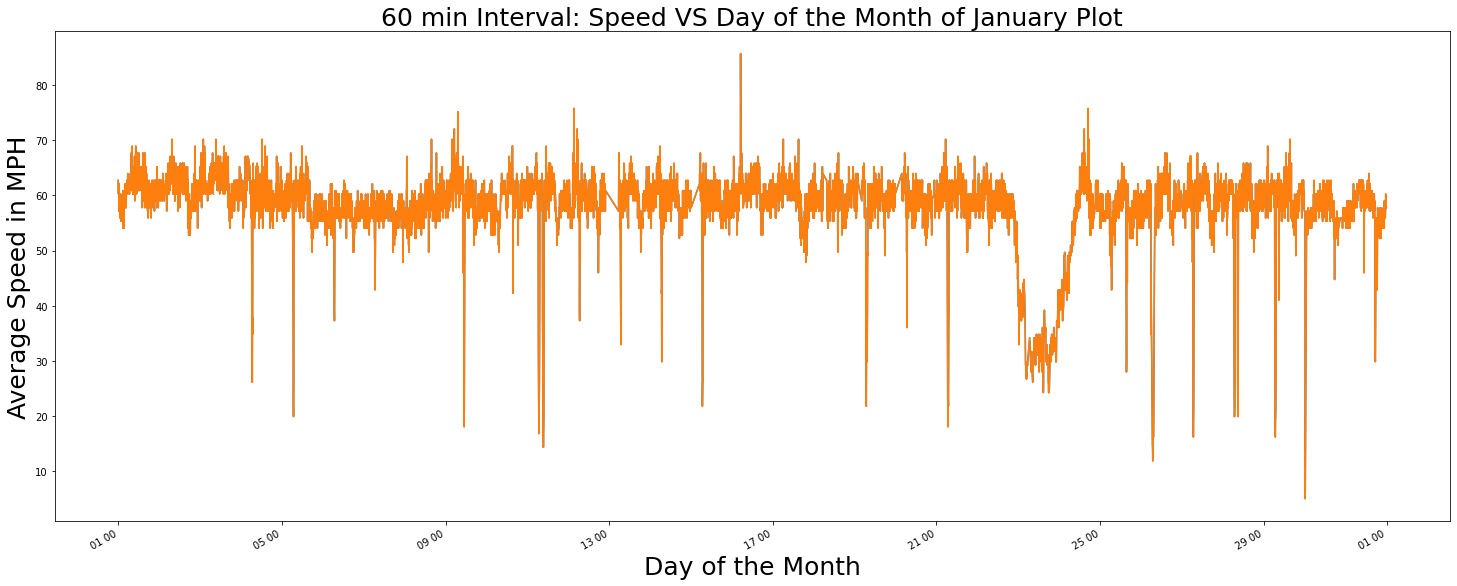

In [ ]:
daily_dateformatter(jan_5DT)

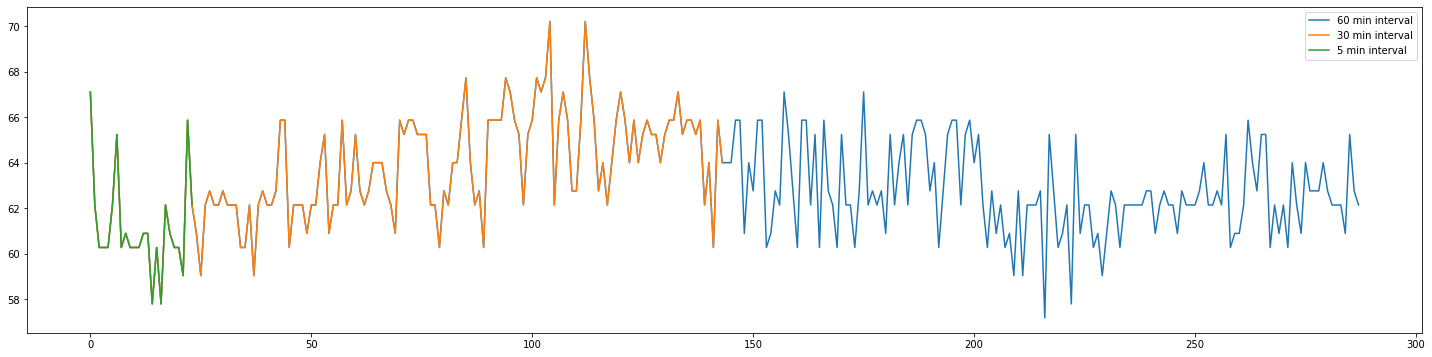

In [ ]:
plt.figure(figsize=(25,6))
plt.plot(jan['Speed'].values[:int(12*24)],label='60 min interval')
plt.plot(jan['Speed'].values[:int(6*24)],label='30 min interval')
plt.plot(jan['Speed'].values[:int(24)],label='5 min interval')
plt.legend()
plt.show()

In [ ]:
#daily_dateformatter(jan_30DT)

In [ ]:
jan_60DT

,linkId,TravelTime,Speed,Month,Day,Weekday,week,DateTime
0,4616214,79,62.76,1,1,Friday,53,2016-01-01 00:01:01
12,4616214,90,55.92,1,1,Friday,53,2016-01-01 01:01:01
24,4616214,86,57.79,1,1,Friday,53,2016-01-01 02:01:01
36,4616214,90,55.92,1,1,Friday,53,2016-01-01 03:01:01
48,4616214,84,60.27,1,1,Friday,53,2016-01-01 04:01:00
...,...,...,...,...,...,...,...,...
8772,4616214,79,57.79,1,31,Sunday,4,2016-01-31 18:45:39
8784,4616214,83,54.06,1,31,Sunday,4,2016-01-31 19:06:39
8796,4616214,83,55.92,1,31,Sunday,4,2016-01-31 20:50:40
8808,4616214,78,57.79,1,31,Sunday,4,2016-01-31 22:10:40


In [ ]:
#SPEED DISTRIBUTION

def weekly_speedDistribution(file):
  import plotly.express as px

  plot_length = 150
  plot_df =file.copy(deep=True).iloc[:plot_length]
  plot_df['weekday'] = plot_df['DateTime'].dt.day_name()

  fig = px.line(plot_df,
                x="DateTime",
                y="Speed", 
                color="weekday", 
                title="Speed Vs Date")
  return fig.show()

In [ ]:
weekly_speedDistribution(jan_60DT)

In [ ]:
#TRAVELTIME DISTRIBUTION

def weekly_TravelTimeDistribution(file):
  import plotly.express as px

  plot_length = 160
  plot_df =file.copy(deep=True).iloc[:plot_length]
  plot_df['weekday'] = plot_df['DateTime'].dt.day_name()

  fig = px.line(plot_df,
                x="DateTime",
                y="TravelTime", 
                color="weekday", 
                title="TravelTime Vs Date")
  return fig.show()

In [ ]:
weekly_TravelTimeDistribution(jan_60DT)

In [ ]:
def weekly_boxplots(file,mon): 
  """
  This function plots boxplots based on the speeds of each day of the week for a particular month
  
  """                                                                                                                                        
  sns.set(style='whitegrid', rc={"grid.linewidth": 0.2})
  sns.set_context("paper", font_scale=1.5) 
  color = sns.color_palette("Set2", 7)


  plt.figure(figsize=(12, 7))
  plot=sns.boxplot(x='Weekday', y='Speed', data=file,width=0.8, linewidth = 1.5)
  plot.axes.set_title("Boxplots for speed distribution for March ",fontsize=25)
  plot.set_xlabel("Days of the Week",fontsize=25)
  plot.set_ylabel("Speed in MPH",fontsize=25)
  return plot



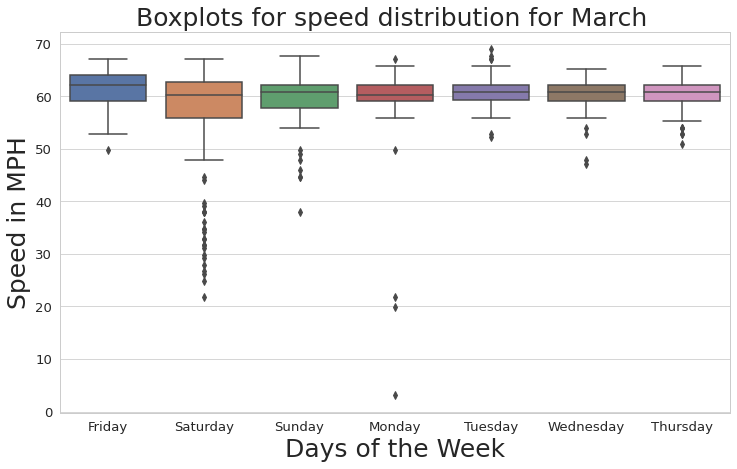

In [ ]:
weekly_boxplots(jan_60DT,1)

## **FEBRUARY EXPLORATION**

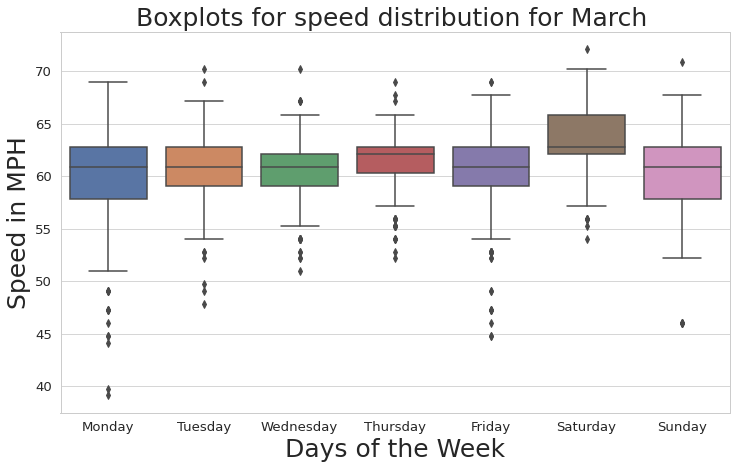

In [ ]:
feb_60=montly_extraction(dataframe,2,3)
feb_60DT=dateTime(feb_60)
weekly_boxplots(feb_60DT,2)

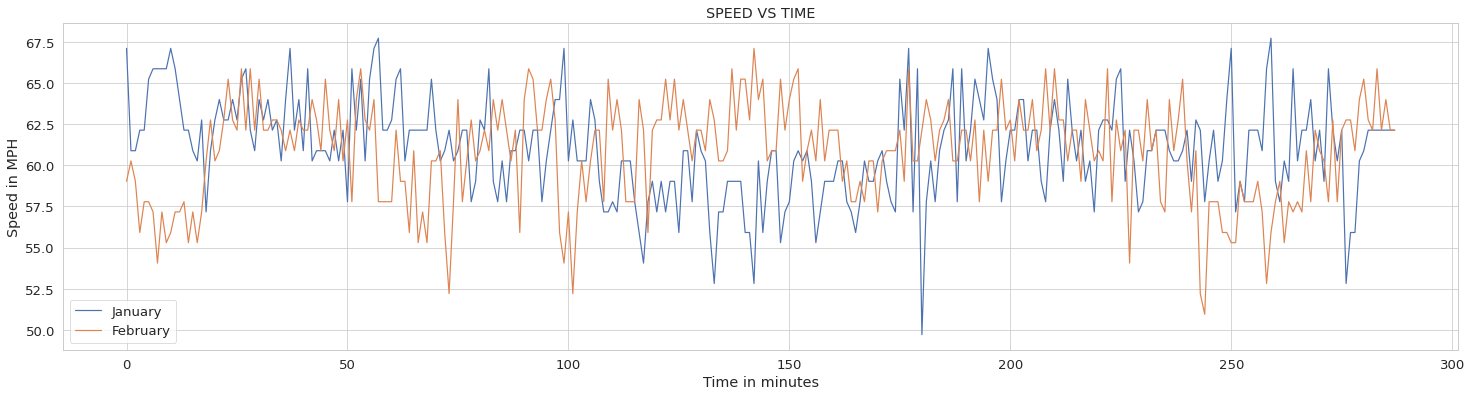

In [ ]:
plt.figure(figsize=(25,6))
plt.plot(jan_60DT['Speed'].values[:int(12*24)],label='January')
plt.plot(feb_60DT['Speed'].values[:int(12*24)],label='February')
plt.plot(mar_60DT['Speed'].values[:int(12*24)],label='March')
plt.title('SPEED VS TIME')
plt.xlabel('Time in minutes')
plt.ylabel('Speed in MPH')
plt.legend()
#feb_60DT


In [ ]:
weekly_speedDistribution(dataframe)

**MARCH EXPLORATION**

In [ ]:
mar_60=montly_extraction(dataframe,3)
mar_60DT=dateTime(mar_60)
weekly_boxplots(mar_60DT,3)

## **PARTITIONING THE DATASET INTO 5MINUTES, 30MINUTES AND 60 MINUTES INTERVALS**

In [ ]:
#ADDING THE DATETIME COLUMN
dataframe.loc[:,'DateTime'] = pd.to_datetime(dataframe.Date.astype(str)+' '+dataframe.Time.astype(str))
#ADDING THE MINUTES COLUMN
dataframe['Minutes']=dataframe['DateTime'].dt.minute
dataframe

In [ ]:
def interval_extraction(df,interval):
  #ETRACTION OF THE MONTHLY DATA
  #df1=df.loc[df['Month']==month]
  #HOURLY SUBSAMPLING
  df1=df[::interval]
  return df1

In [ ]:
hourly=interval_extraction(dataframe,12)


### **FIVE MINUTES INTERVAL**

In [ ]:
fiveMin=dataframe

### **THIRTY MINUTES INTERVAL**

In [ ]:
thirtyMin=interval_extraction(dataframe,6)
#SAVING THE THIRTY MIN INTERVAL DATAFRAME
thirtyMin.to_csv("path_4616214.csv",index=False)

In [ ]:
#DELETING THE LAST TWO COLUMNS WHICH ARE OUTLIERS
#thirtyMin = thirtyMin.iloc[:-2 , :]

In [ ]:
thirtyMin

In [ ]:
weekly_speedDistribution(thirtyMin)

In [ ]:
plt.figure(figsize=(25,6))
plt.plot(thirtyMin['Speed'].values[:int(6*24)])

In [ ]:
#NORMALIZATION OF THE SPEED DATA
def ReScale(data, a):
    data_avg = data.mean()
    scaled_data = a*(data - data_avg)
    return scaled_data 

In [ ]:
plt.plot(ReScale(thirtyMin['Speed'],1/75))

In [ ]:
plt.plot(ReScale(thirtyMin['Speed'],1/50))

In [ ]:
plt.plot(ReScale(thirtyMin['TravelTime'],1/1250))

In [ ]:
plt.plot(ReScale(thirtyMin['TravelTime'],1/1000))

In [ ]:
#NORMALIZING THE SPEED AND TRAVEL TIME DATA
thirtyMin['norm_speed'] = ReScale(thirtyMin['Speed'],1/50)
thirtyMin['norm_travelTime'] = ReScale(thirtyMin['TravelTime'],1/1250)

In [ ]:
#SAVING THE NORMALIZED CSV FILE DATA 
thirtyMin.to_csv("norm_path_4616214.csv",index=False)

In [ ]:
thirtyMin

### **HOURLY INTERVALS**

In [ ]:
hourly=interval_extraction(dataframe,12)

## **PREPARATION OF THE DATA**
We introduce the concept of slidig window technique. We use 4 past time slots to predict the speed of the next time slot.

## **DESIGNING THE LSTM ARCHITECTURE**

**TRAINING THE MODEL**

## **Evaluating performance of the model**

## **BI-LSTM MODEL**

In [ ]:
 import numpy as np
 from keras.preprocessing import sequence
 from keras.models import Sequential
 from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
 from keras.datasets import imdb 

In [ ]:
path_90=linkId_files[90]